In [1]:
# Librerie
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Importa il dataset come panda
data = pd.read_csv('pokemon_alopez247.csv')
workflow_data = pd.read_csv('workflow_normalized.csv')
type(data)

pandas.core.frame.DataFrame

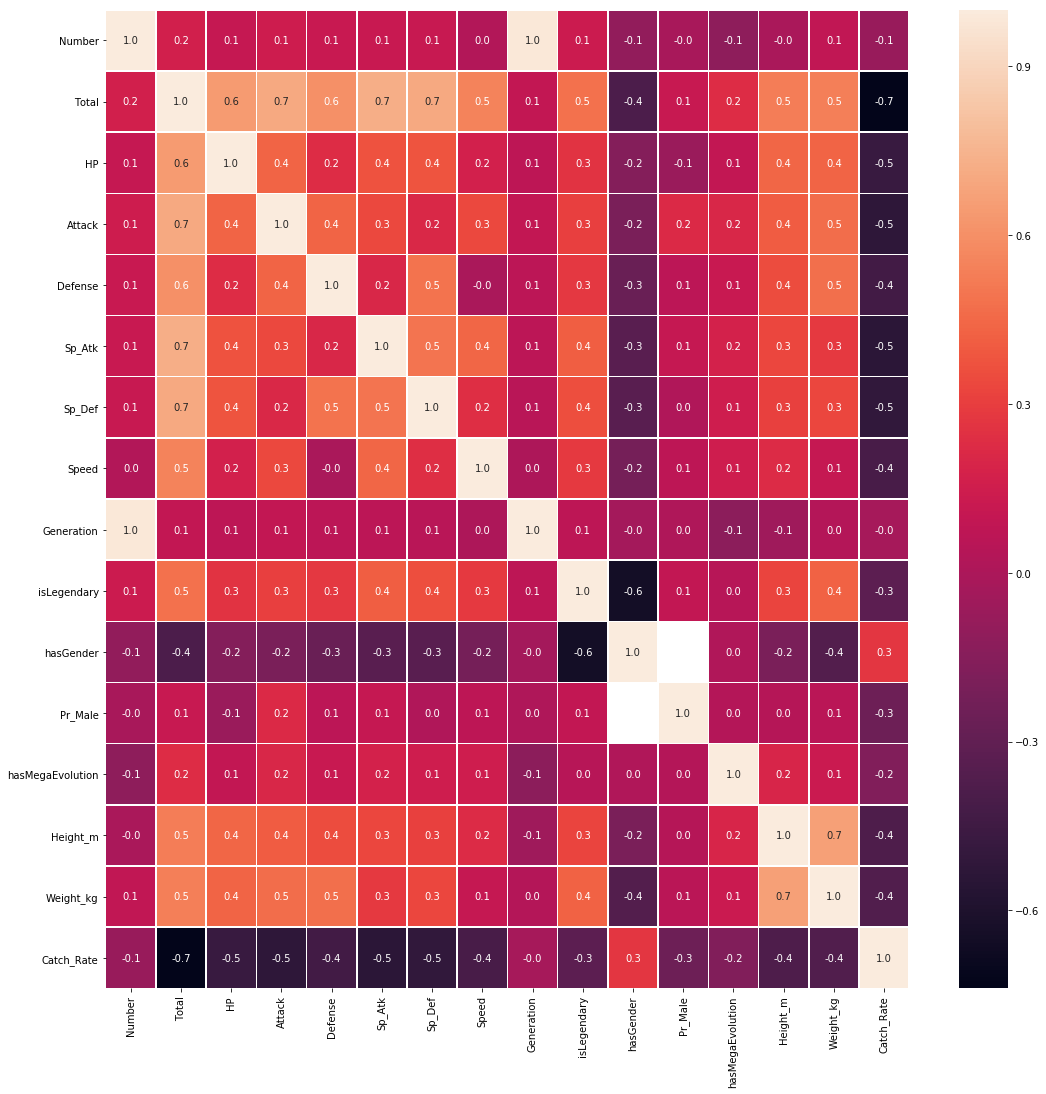

In [3]:
#Mappa delle correlazioni
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)

In [4]:
#Nuovo dataframe con solo le variabili che ci interessano
stats = workflow_data[['Name', 'HP','Attack','Defense','Sp_Atk','Sp_Def','Speed', 'Cluster']]
stats.head()

,Name,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Cluster
0,Bulbasaur,0.365772,0.347500,0.373103,0.453571,0.411538,0.348276,cluster_2
1,Ivysaur,0.456376,0.420625,0.460000,0.550000,0.515385,0.441379,cluster_2
2,Venusaur,0.577181,0.533125,0.584138,0.678571,0.653846,0.565517,cluster_2
3,Charmander,0.329530,0.364375,0.335862,0.421429,0.307692,0.472414,cluster_2
4,Charmeleon,0.444295,0.431875,0.428966,0.550000,0.411538,0.565517,cluster_2


In [5]:
stats.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
count,717.000000,717.00000,717.000000,717.000000,717.000000,717.000000
mean,0.502895,0.49528,0.506487,0.478147,0.438352,0.477565
std,0.140557,0.16164,0.170507,0.184685,0.179402,0.168850
min,0.100000,0.10000,0.100000,0.100000,0.100000,0.100000
25%,0.395973,0.38125,0.379310,0.325000,0.307692,0.348276
50%,0.486577,0.49375,0.472414,0.453571,0.411538,0.472414
75%,0.577181,0.60625,0.596552,0.614286,0.550000,0.596552
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [6]:
def cluster_radargraph(cluster_list):
    
    # Creazione background
    # Numero di variabili
    categories=list(stats)[1:7]
    N = len(categories)
        
    # Ampiezza degli angoli
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Inizializzazione radar chart
    plt.figure(figsize=(10,10)) 
    ax = plt.subplot(111, polar=True)
    
    # Nome delle categorie
    plt.xticks(angles[:-1], categories, color='grey', size=14)
    
    # Scrive le label
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["Basso","Medio","Alto"], color="grey", size=12)
    plt.ylim(0,1)
    
    # Disegna il grafico per ogni Clusterr
    for cluster_number in cluster_list:
        val= stats.groupby(['Cluster']).mean().values.tolist()[cluster_number]
        val += val[:1]
        ax.plot(angles, val, linewidth=1, linestyle='solid', label=cluster_number)
        ax.fill(angles, val, 'b', alpha=0.1)
    
    # Aggiunge una legenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

Digitare 'Done' per terminare e visualizzare il grafico
Inserire il numero del Cluster: 0
0
Inserire il numero del Cluster: 1
1
Inserire il numero del Cluster: 2
2
Inserire il numero del Cluster: 3
3


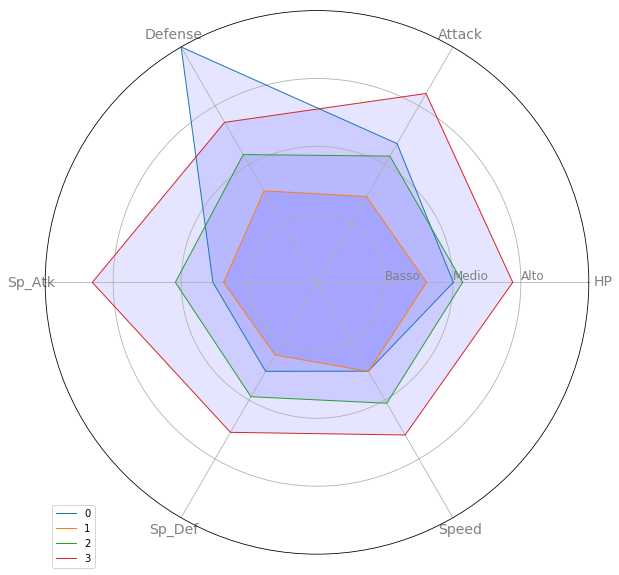

In [72]:
cluster_list = []
print("Digitare 'Done' per terminare e visualizzare il grafico")
while len(cluster_list) < 4:
    try:
        pokein = int(input("Inserire il numero del Cluster: ")) 
        print(pokein)
        if pokein > 3 or pokein in cluster_list:
            print("Errore: inserire un cluster non ancora aggiunto, con numero compreso tra 0 e 3.")
            continue
        cluster_list.append(pokein)
    except:
        break
cluster_radargraph(cluster_list)

In [70]:
def radarstd(cluster_number):
    
    # Creazione background
    # Numero di variabili
    categories=list(stats)[1:7]
    N = len(categories)
        
    # Ampiezza degli angoli
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Inizializzazione radar chart
    plt.figure(figsize=(10,10)) 
    ax = plt.subplot(111, polar=True)
    
    # Nome delle categorie
    plt.xticks(angles[:-1], categories, color='grey', size=20)
    
    # Scrive le label
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["Low","Med","High"], color="grey", size=15)
    plt.ylim(0,1)
    
    # Liste con valori e deviazioni standard
    val= stats.groupby(['Cluster']).mean().values.tolist()[cluster_number]
    val += val[:1]
    std = stats.groupby(['Cluster']).std().values.tolist()[cluster_number]
    std += std[:1]
    valmin = [v - std for v, std in zip(val,std)]
    valmax = [v + std for v, std in zip(val,std)]
    
    # Disegna il grafico
    ax.plot(angles, val, 'm', linewidth=1, linestyle='solid', label='Cluster 3')
    ax.plot(angles, valmax, '#9467bd', linewidth=1, linestyle='--')
    ax.plot(angles, valmin, '#9467bd', linewidth=1, linestyle='--')
    ax.fill_between(angles, valmin, valmax, facecolor='#9467bd', alpha = 0.2)
    ax.fill(angles, valmin, '#9467bd', alpha=0.05)
    
    # Aggiunge una legenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 18})

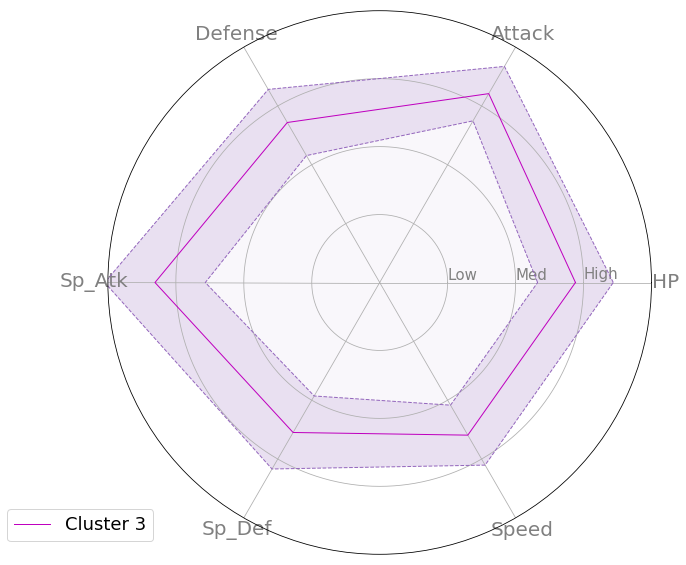

In [72]:
radarstd(3)